In [1]:
#Package & Data Imports

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from scipy.special import inv_boxcox

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_predict,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
#Read data
data_path = ['data']
file_path = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(file_path,sep=',')
data.shape

(1379, 80)

In [4]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [5]:
data.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [6]:
data.describe().T #numeric features NOT on same scale

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1379.0,1177.129804,387.014961,438.0,894.0,1098.0,1414.0,4692.000000
2ndFlrSF,1379.0,353.424946,439.553171,0.0,0.0,0.0,738.5,2065.000000
3SsnPorch,1379.0,3.609862,30.154682,0.0,0.0,0.0,0.0,508.000000
BedroomAbvGr,1379.0,2.865120,0.783961,0.0,2.0,3.0,3.0,6.000000
BsmtFinSF1,1379.0,455.578680,459.691379,0.0,0.0,400.0,732.0,5644.000000
BsmtFinSF2,1379.0,48.102248,164.324665,0.0,0.0,0.0,0.0,1474.000000
BsmtFullBath,1379.0,0.430747,0.514052,0.0,0.0,0.0,1.0,2.000000
BsmtHalfBath,1379.0,0.058738,0.238285,0.0,0.0,0.0,0.0,2.000000
BsmtUnfSF,1379.0,570.765047,443.677845,0.0,228.0,476.0,811.0,2336.000000
EnclosedPorch,1379.0,21.039159,60.535107,0.0,0.0,0.0,0.0,552.000000


In [7]:
#Target Variable Normality Test

<AxesSubplot:>

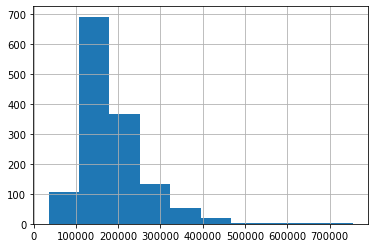

In [8]:
data['SalePrice'].hist()

In [9]:
normaltest(data['SalePrice']) #p-value <0.05 failed Normal Test

NormaltestResult(statistic=594.3267259061613, pvalue=8.781955774010152e-130)

In [10]:
saleprice_raw = data['SalePrice']
saleprice_log = np.log(data['SalePrice'])
saleprice_sqrt = np.sqrt(data['SalePrice'])
saleprice_boxcox = boxcox(data['SalePrice'])[0]
lam_boxcox = boxcox(data['SalePrice'])[1]
lam_boxcox

-0.2038831773965207

NormaltestResult(statistic=594.3267259061613, pvalue=8.781955774010152e-130)

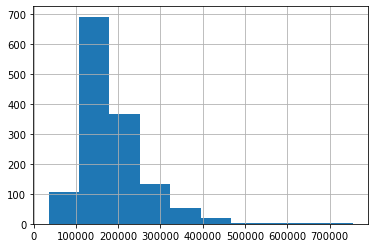

In [11]:
saleprice_raw.hist()
normaltest(saleprice_raw) #failed Normal Test

NormaltestResult(statistic=34.99459487049111, pvalue=2.517794471815587e-08)

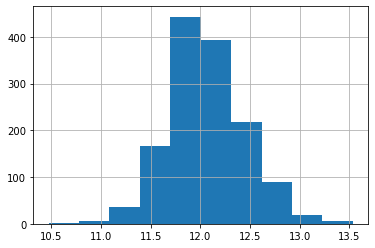

In [12]:
saleprice_log.hist()
normaltest(saleprice_log) #failed Normal Test

NormaltestResult(statistic=20.60421626101897, pvalue=3.356226691547964e-05)

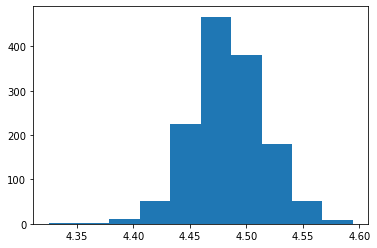

In [13]:
plt.hist(saleprice_boxcox)
normaltest(saleprice_boxcox) #closest to a Normal dist

In [14]:
#Empirical Feature Selection

In [15]:
data.columns.tolist()

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [16]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

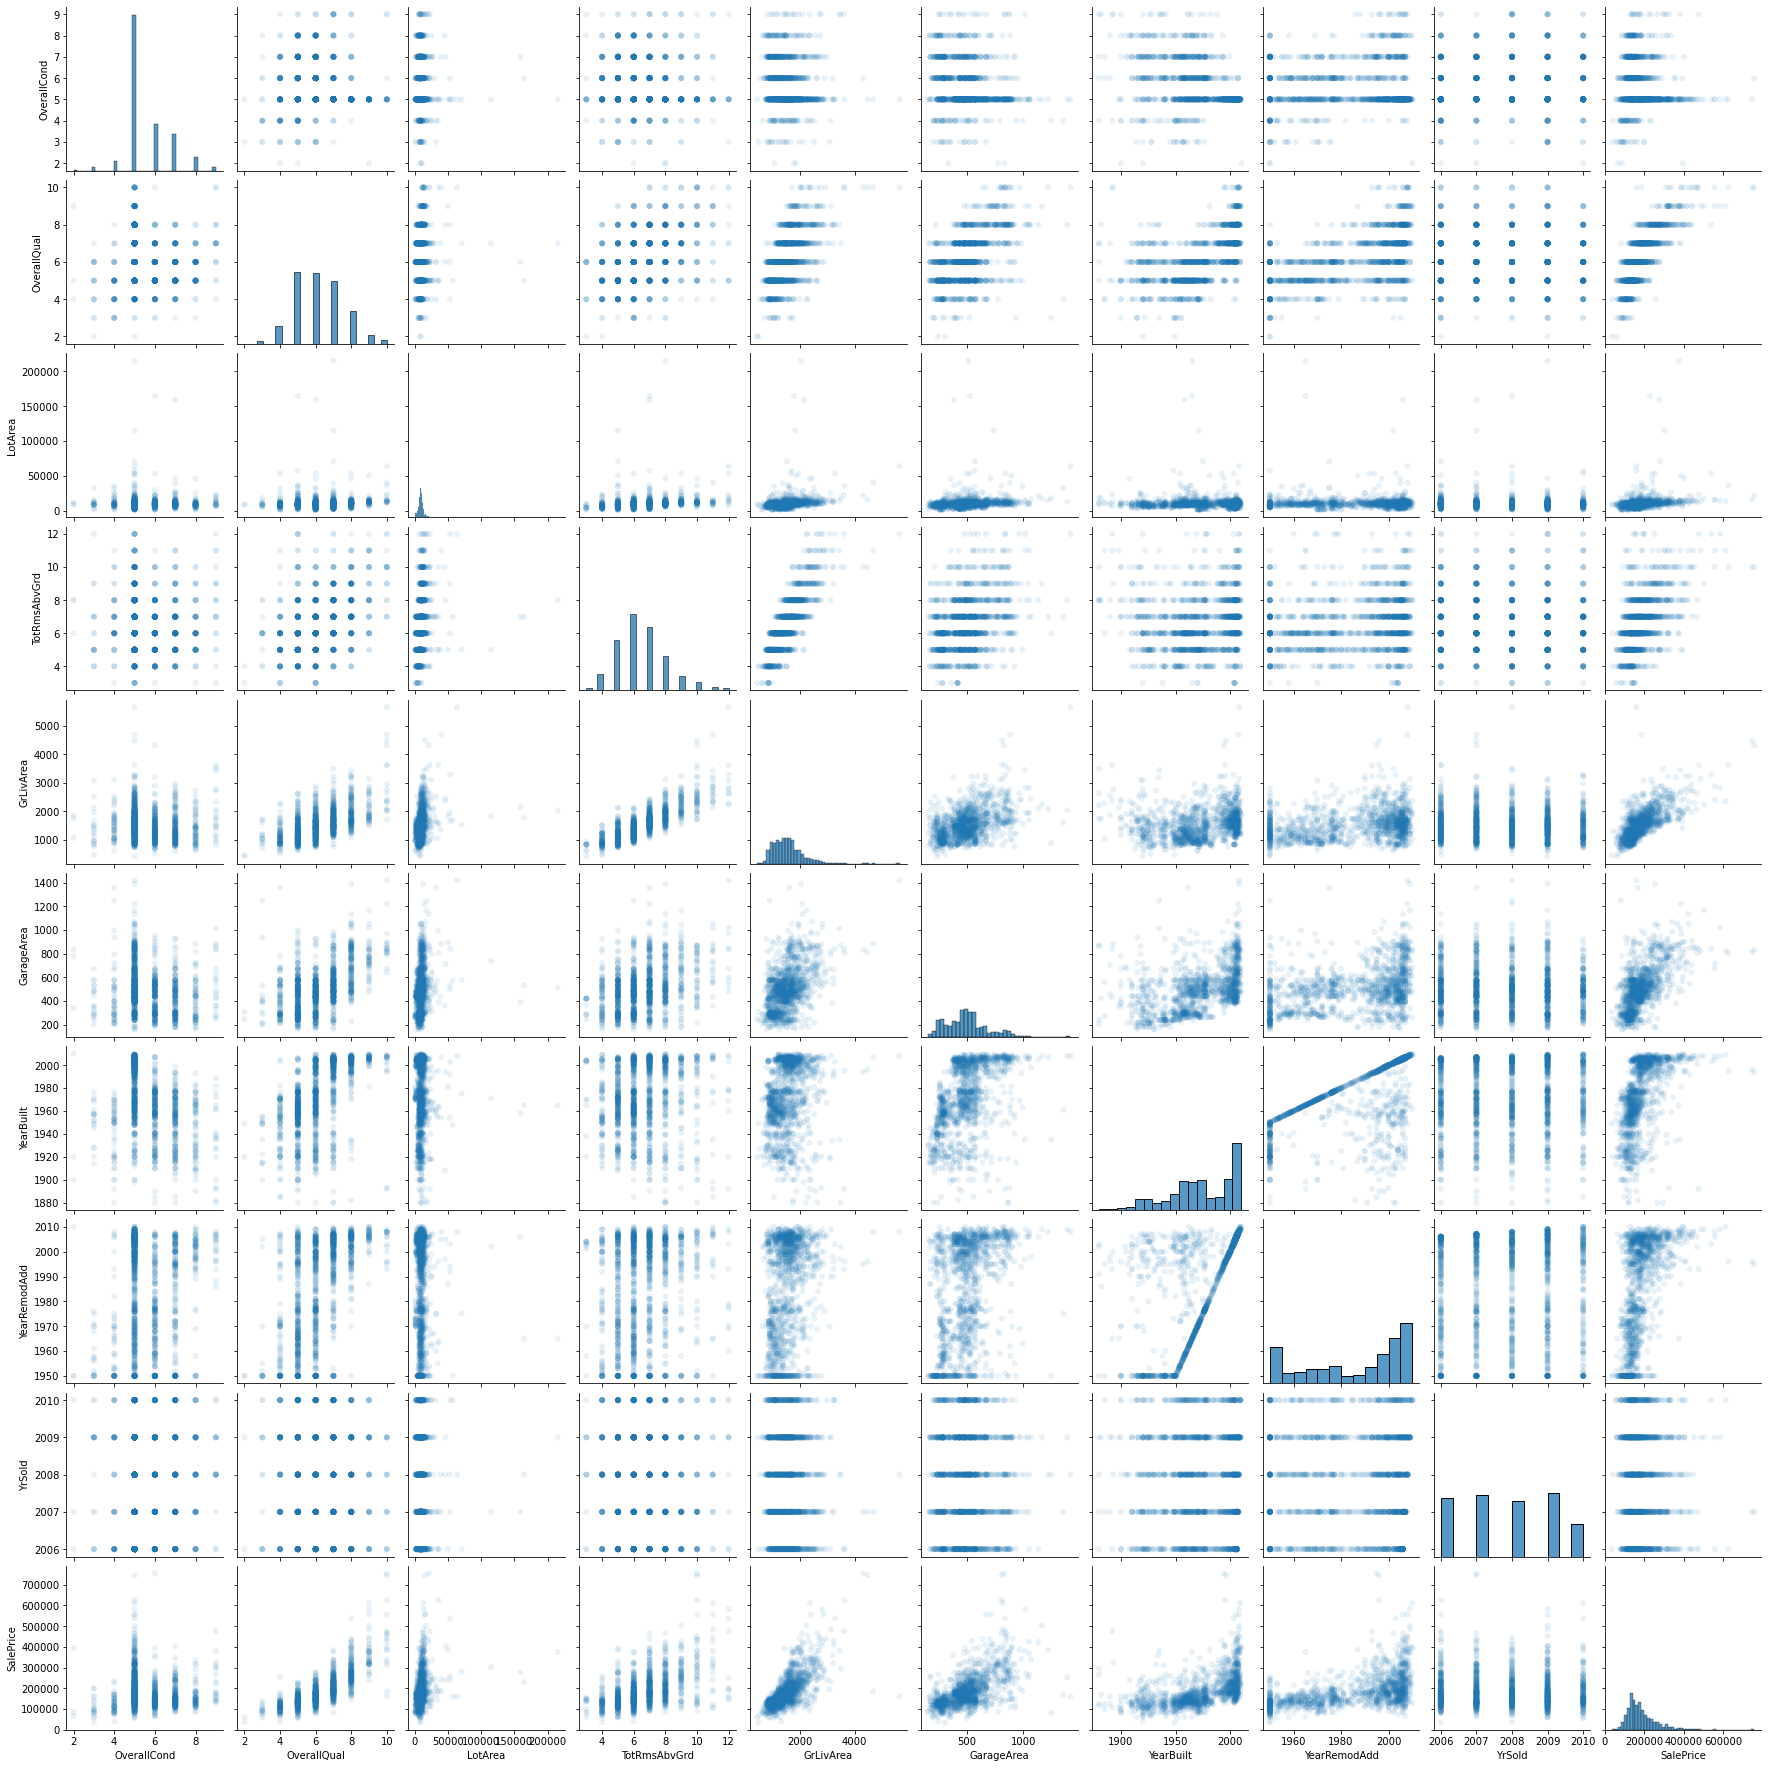

In [17]:
expdata = data.loc[:,['OverallCond','OverallQual',
                   'LotArea','LotShape','TotRmsAbvGrd',
                   'GrLivArea','GarageArea','GarageType',
                   'Neighborhood','HouseStyle',
                   'YearBuilt','YearRemodAdd','YrSold',
                   'SaleCondition','SaleType','SalePrice']]

sns.pairplot(expdata, plot_kws=dict(alpha=0.1, edgecolor='none'))

In [18]:
expdata.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallCond,1379.0,5.577955,1.081031,2.0,5.0,5.0,6.0,9.0
OverallQual,1379.0,6.187092,1.345780,2.0,5.0,6.0,7.0,10.0
LotArea,1379.0,10695.812183,10214.702133,1300.0,7741.0,9591.0,11708.5,215245.0
TotRmsAbvGrd,1379.0,6.552574,1.589821,3.0,5.0,6.0,7.0,12.0
GrLivArea,1379.0,1534.689630,519.140514,438.0,1154.0,1479.0,1790.0,5642.0
GarageArea,1379.0,500.762146,185.680520,160.0,380.0,484.0,580.0,1418.0
YearBuilt,1379.0,1972.958666,29.379883,1880.0,1955.0,1976.0,2001.0,2010.0
YearRemodAdd,1379.0,1985.435098,20.444852,1950.0,1968.0,1994.0,2004.0,2010.0
YrSold,1379.0,2007.812183,1.330221,2006.0,2007.0,2008.0,2009.0,2010.0
SalePrice,1379.0,185479.511240,79023.890600,35311.0,134000.0,167500.0,217750.0,755000.0


In [19]:
expdata.dtypes#Lo.value_counts()

OverallCond        int64
OverallQual        int64
LotArea          float64
LotShape          object
TotRmsAbvGrd       int64
GrLivArea        float64
GarageArea       float64
GarageType        object
Neighborhood      object
HouseStyle        object
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
SaleCondition     object
SaleType          object
SalePrice        float64
dtype: object

In [20]:
#Feature Engineering

In [21]:
catg_cols = expdata.columns[expdata.dtypes==np.object]
num_cols = expdata.columns[expdata.dtypes!=np.object]

float_cols = expdata.columns[expdata.dtypes==np.float]
int_cols = expdata.columns[expdata.dtypes==np.int]

/var/folders/jz/0vshmh6x6pbfhh1c0v8jvx8c0000gn/T/ipykernel_8523/1903098904.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  catg_cols = expdata.columns[expdata.dtypes==np.object]
/var/folders/jz/0vshmh6x6pbfhh1c0v8jvx8c0000gn/T/ipykernel_8523/1903098904.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_cols = expdata.columns[expdata.dtypes!=np.object]
/var/folders/jz/0vshmh6x6pbfhh1c0v8jvx8c0000gn/T/ipykernel_8523/1903098904.py:4: DeprecationWarning: `np.float` is 

In [22]:
#Skew Transformation
skew_limit = 0.75
skew_vals = expdata[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
skew_cols

,Skew
LotArea,12.013038
SalePrice,1.935362
GrLivArea,1.411296
GarageArea,0.811037


Text(0.5, 0.98, 'Field "GrLivArea"')

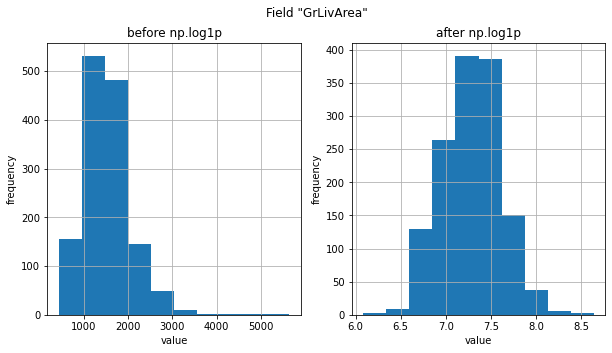

In [23]:
#Visualize skew transformation
field = 'GrLivArea'
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
expdata['GrLivArea'].hist(ax=ax_before)
expdata['GrLivArea'].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))

In [24]:
modeldata = expdata.copy()
for col in skew_cols.index.tolist():
    if col == 'SalePrice':
        continue
    modeldata[col] = np.log1p(modeldata[col])

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>]], dtype=object)

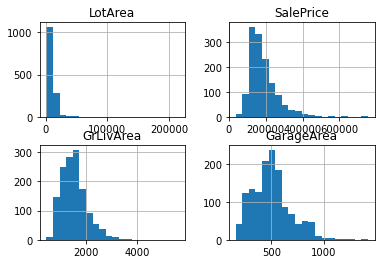

In [25]:
expdata[skew_cols.index].hist(bins=20) #before skew transformation

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>]], dtype=object)

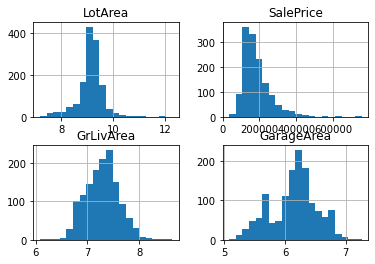

In [26]:
modeldata[skew_cols.index].hist(bins=20) #after skew transformation

In [27]:
#Encoding Categorical Var's
catg_cols_ohc = (modeldata[catg_cols]
           .apply(lambda x: x.nunique())
           .sort_values(ascending=False))
catg_cols_ohc#.sum()

Neighborhood     25
SaleType          9
HouseStyle        8
GarageType        6
SaleCondition     6
LotShape          4
dtype: int64

In [28]:
#out of 16 vars, 6 categorical encoded into 58-6=52, plus 10 numeric gives 62 vars post-ohc
modeldata_ohc = modeldata.copy()
modeldata_ohc = pd.get_dummies(modeldata_ohc, columns=catg_cols, drop_first=True)
modeldata_ohc.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallCond,1379.0,5.577955,1.081031,2.000000,5.000000,5.000000,6.000000,9.000000
OverallQual,1379.0,6.187092,1.345780,2.000000,5.000000,6.000000,7.000000,10.000000
LotArea,1379.0,9.128550,0.512417,7.170888,8.954415,9.168685,9.368155,12.279537
TotRmsAbvGrd,1379.0,6.552574,1.589821,3.000000,5.000000,6.000000,7.000000,12.000000
GrLivArea,1379.0,7.284281,0.322569,6.084499,7.051856,7.299797,7.490529,8.638171
...,...,...,...,...,...,...,...,...
SaleType_ConLI,1379.0,0.002901,0.053799,0.000000,0.000000,0.000000,0.000000,1.000000
SaleType_ConLw,1379.0,0.002901,0.053799,0.000000,0.000000,0.000000,0.000000,1.000000
SaleType_New,1379.0,0.087020,0.281966,0.000000,0.000000,0.000000,0.000000,1.000000
SaleType_Oth,1379.0,0.000725,0.026929,0.000000,0.000000,0.000000,0.000000,1.000000


In [29]:
#Add Polynomial Features & Feature Interactions

In [30]:
modeldata_ohcwpoly = modeldata_ohc.copy()
modeldata_ohcwpoly['OverallQual ^2'] = modeldata_ohc['OverallQual'] ** 2
modeldata_ohcwpoly['GarageArea ^2'] = modeldata_ohc['GarageArea'] ** 2
modeldata_ohcwpoly['OverallQual * OverallCond'] = modeldata_ohc['OverallQual'] * modeldata_ohc['OverallCond']
modeldata_ohcwpoly['LotArea / TotRmsAbvGrd'] = modeldata_ohc['LotArea'] / modeldata_ohc['TotRmsAbvGrd']

In [31]:
#Train-Test Splits

In [32]:
y_col = 'SalePrice'

#raw model data - 15 features, float features unskewed
X_modeldata = modeldata.drop(y_col, axis=1)
y_modeldata = modeldata[y_col]
X_train, X_test, y_train, y_test = train_test_split(X_modeldata, y_modeldata, test_size=0.3, random_state=416)

#ohc model - 61 features, categorical features one hot encoded; optional to scale numeric features too
X_modeldata_ohc = modeldata_ohc.drop(y_col, axis=1)
y_modeldata_ohc = modeldata_ohc[y_col]
X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_modeldata_ohc, y_modeldata_ohc, test_size=0.3, random_state=416)

stdscaler = StandardScaler()
X_train_ohcwscal = stdscaler.fit_transform(X_train_ohc)
X_test_ohcwscal = stdscaler.transform(X_test_ohc)

#ohc wpoly model - 65 features, with polynomial features & interactions
X_modeldata_ohcwpoly = modeldata_ohcwpoly.drop(y_col, axis=1)
y_modeldata_ohcwpoly = modeldata_ohcwpoly[y_col]
X_train_ohcwpoly, X_test_ohcwpoly, y_train_ohcwpoly, y_test_ohcwpoly = train_test_split(X_modeldata_ohcwpoly, y_modeldata_ohcwpoly, test_size=0.3, random_state=416)

#ohc wpoly bc model - 65 features, with target var boxcox transformed
boxcox_fit = boxcox(y_train)
y_train_bc = boxcox_fit[0]
lam_boxcox = boxcox_fit[1]



(array([  1.,   1.,   7.,  38., 152., 327., 275., 121.,  38.,   5.]),
 array([4.29884657, 4.32523473, 4.35162289, 4.37801105, 4.40439921,
        4.43078736, 4.45717552, 4.48356368, 4.50995184, 4.53634   ,
        4.56272816]),
 <BarContainer object of 10 artists>)

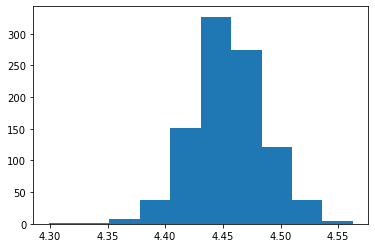

In [33]:
#plt.hist(y_train)
plt.hist(y_train_bc)

In [34]:
(y_train_ohcwpoly == y_train).all()

True

In [35]:
(X_train_ohcwpoly.index == X_train.index).all()

True

In [36]:
X_train.head().T

,1216,950,33,378,1219
OverallCond,5,3,5,8,7
OverallQual,8,6,5,5,5
LotArea,8.642062,9.405578,9.264165,9.230241,7.427144
LotShape,IR1,IR3,IR1,Reg,Reg
TotRmsAbvGrd,5,7,6,4,6
GrLivArea,7.414573,7.413367,7.438972,6.511745,7.172425
GarageArea,6.214608,6.184149,6.104793,5.484797,5.57973
GarageType,Attchd,Attchd,Attchd,Detchd,Detchd
Neighborhood,StoneBr,NAmes,NAmes,Sawyer,BrDale
HouseStyle,1Story,1Story,1Story,1Story,2Story


In [37]:
#Linear Regression Preliminary Testing - w/o Regularization

In [61]:
LR = LinearRegression()

error_list = list()

#Baseline OHC Model
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_pred_ohc = LR.predict(X_train_ohc)
y_test_pred_ohc = LR.predict(X_test_ohc)

error_list.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_pred_ohc),
                             'test': mean_squared_error(y_test_ohc, y_test_pred_ohc)},
                             name = 'OneHot Encoded Baseline LR Model'))

#Optional: Baseline OHC wScaling Model
LR = LR.fit(X_train_ohcwscal, y_train_ohc)
y_train_pred_ohcwscal = LR.predict(X_train_ohcwscal)
y_test_pred_ohcwscal = LR.predict(X_test_ohcwscal)

error_list.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_pred_ohcwscal),
                             'test': mean_squared_error(y_test_ohc, y_test_pred_ohcwscal)},
                             name = 'OneHot Encoded w/ Scaling Baseline LR Model'))

#OHC wPolynomial Features Model
LR = LR.fit(X_train_ohcwpoly, y_train_ohcwpoly)
y_train_pred_ohcwpoly = LR.predict(X_train_ohcwpoly)
y_test_pred_ohcwpoly = LR.predict(X_test_ohcwpoly)

error_list.append(pd.Series({'train': mean_squared_error(y_train_ohcwpoly, y_train_pred_ohcwpoly),
                             'test': mean_squared_error(y_test_ohcwpoly, y_test_pred_ohcwpoly)},
                             name = 'OneHot Encoded w/ Polynomial Features Baseline LR Model'))

#OHC wPolynomial Features and BoxCox Transformed Target Model
LR = LR.fit(X_train_ohcwpoly, y_train_bc)
y_train_pred_ohcwpolybc_2inv = LR.predict(X_train_ohcwpoly)
y_test_pred_ohcwpolybc_2inv = LR.predict(X_test_ohcwpoly)

y_train_pred_ohcwpolybc = inv_boxcox(y_train_pred_ohcwpolybc_2inv, lam_boxcox)
y_test_pred_ohcwpolybc = inv_boxcox(y_test_pred_ohcwpolybc_2inv, lam_boxcox)

error_list.append(pd.Series({'train': mean_squared_error(y_train_ohcwpoly, y_train_pred_ohcwpolybc),
                             'test': mean_squared_error(y_test_ohcwpoly, y_test_pred_ohcwpolybc)},
                             name = 'OneHot Encoded w/ Polynomial Features and Target BoxCox Transformed Baseline LR Model'))

pd.concat(error_list, axis=1).T

#Scaling has no effect on simple Linear Regression (w/o regularization)
#Polynomial features/interaction terms have improved predictive power
#BoxCox transforming target var to be more Normally distributed helps improve accuracy

,train,test
OneHot Encoded Baseline LR Model,1.052933e+09,1.419160e+09
OneHot Encoded w/ Scaling Baseline LR Model,1.052933e+09,1.419160e+09
OneHot Encoded w/ Polynomial Features Baseline LR Model,8.641747e+08,1.252315e+09
OneHot Encoded w/ Polynomial Features and Target BoxCox Transformed Baseline LR Model,7.546521e+08,1.206515e+09


[Text(0.5, 0, 'TestSet Actuals'),
 Text(0, 0.5, 'TestSet Predictions'),
 Text(0.5, 1.0, 'OHC LR Model Validation')]

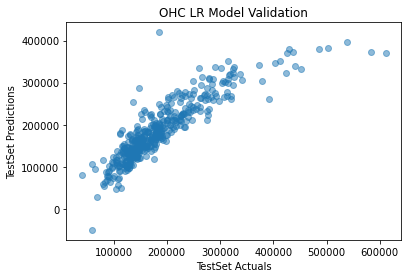

In [39]:
ax = plt.axes()
ax.scatter(y_test_ohc, y_test_pred_ohc, alpha=0.5)
ax.set(xlabel='TestSet Actuals',
       ylabel='TestSet Predictions',
       title='OHC LR Model Validation')

Text(0.5, 0.98, 'TestSet Validation: Linear Regression Models - w/o Regularization')

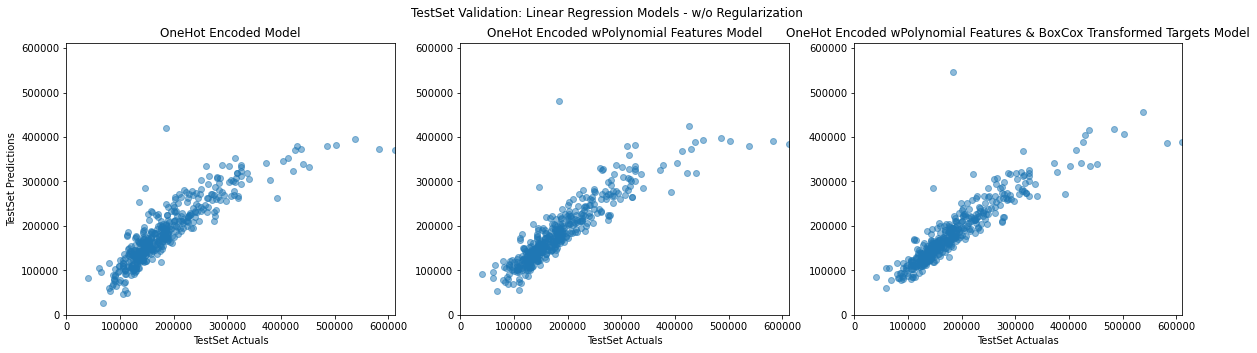

In [40]:
models_testing = 'Linear Regression Models - w/o Regularization'

fig, (ax_ohc, ax_ohcwpoly, ax_ohcwpolybc) = plt.subplots(1,3,figsize=(20,5))
ax_ohc.scatter(y_test_ohc, y_test_pred_ohc, alpha=0.5)
ax_ohcwpoly.scatter(y_test_ohcwpoly, y_test_pred_ohcwpoly, alpha=0.5)
ax_ohcwpolybc.scatter(y_test_ohcwpoly, y_test_pred_ohcwpolybc, alpha=0.5)

ax_ohc.set(title='OneHot Encoded Model', ylabel='TestSet Predictions', xlabel='TestSet Actuals', xlim=(0,y_test_ohc.max()), ylim=(0,y_test_ohc.max()))
ax_ohcwpoly.set(title='OneHot Encoded wPolynomial Features Model', xlabel='TestSet Actuals', xlim=(0,y_test_ohc.max()), ylim=(0,y_test_ohc.max()))
ax_ohcwpolybc.set(title='OneHot Encoded wPolynomial Features & BoxCox Transformed Targets Model', xlabel='TestSet Actualas', xlim=(0,y_test_ohc.max()), ylim=(0,y_test_ohc.max()))


fig.suptitle('TestSet Validation: {}'.format(models_testing))

In [41]:
templist = list()
templist.append(pd.Series({'col1': 1, 'col2': 2}, name='temp'))
pd.concat(templist,axis=1)

,temp
col1,1
col2,2


In [42]:
#Optional: Linear Regression Testings Coded in a Loop

In [43]:
scalers = {'Standard Scaling': StandardScaler(),
           'MinMax Scaling': MinMaxScaler(),
           'MaxAbs Scaling': MaxAbsScaler()}

traintest_sets = {'One-Hot Encoded, Baseline': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc),
                  'One-Hot Encoded, w/ Polynomial Features': (X_train_ohcwpoly, y_train_ohcwpoly, X_test_ohcwpoly, y_test_ohcwpoly)}

LR = LinearRegression()
error_dict = {}

for model_label, (_X_train, _y_train, _X_test, _y_test) in traintest_sets.items():
    for scaler_label, scaler in scalers.items():
        float_cols = _X_train.columns[_X_train.dtypes==np.float]
        
        train_set = _X_train.copy()
        test_set = _X_test.copy()
        
        train_set[float_cols] = scaler.fit_transform(train_set[float_cols])
        test_set[float_cols] = scaler.transform(test_set[float_cols])
        
        LR.fit(train_set, _y_train)
        test_pred = LR.predict(test_set)
        
        key = model_label + ' - ' + scaler_label
        error_dict[key] = mean_squared_error(_y_test, test_pred)
        
pd.Series(error_dict)

#Scaling has not effects on plain vanilla Linear Regression whatsover!

/var/folders/jz/0vshmh6x6pbfhh1c0v8jvx8c0000gn/T/ipykernel_8523/3674880815.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  float_cols = _X_train.columns[_X_train.dtypes==np.float]
/var/folders/jz/0vshmh6x6pbfhh1c0v8jvx8c0000gn/T/ipykernel_8523/3674880815.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  float_cols = _X_train.colum

One-Hot Encoded, Baseline - Standard Scaling                  1.419160e+09
One-Hot Encoded, Baseline - MinMax Scaling                    1.419160e+09
One-Hot Encoded, Baseline - MaxAbs Scaling                    1.419160e+09
One-Hot Encoded, w/ Polynomial Features - Standard Scaling    1.252315e+09
One-Hot Encoded, w/ Polynomial Features - MinMax Scaling      1.252315e+09
One-Hot Encoded, w/ Polynomial Features - MaxAbs Scaling      1.252315e+09
dtype: float64

In [44]:
#KFold Cross Validation for Hyperparamater Tuning

In [45]:
#Vanilla Linear Regression - KFold Cross Validation
kfold_spliter = KFold(shuffle=True, random_state=416, n_splits=3)

LR_estimator = Pipeline([("scaler", StandardScaler()),
                         ("regression", LinearRegression())])

LR_predictions = cross_val_predict(LR_estimator, X_modeldata_ohc, y_modeldata_ohc, cv=kfold_spliter)

LR_R2score = r2_score(y_modeldata_ohc, LR_predictions) #gives R2 Score on TestSet predictions

LR_R2score


0.7902634177174979

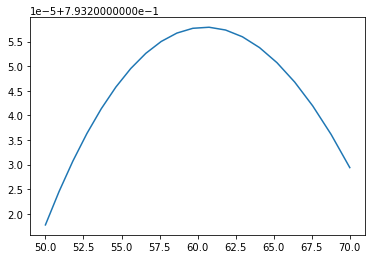

In [46]:
#Hyperparameter Tuning - Ridge Linear Regression
kfold_spliter = KFold(shuffle=True, random_state=416, n_splits=3)
#Ridge_alphas = np.geomspace(1e0, 1e2, num=20)
Ridge_alphas = np.geomspace(50, 70, num=20) #60 best alpha
Ridge_scores = []

for alpha in Ridge_alphas:
    Ridge_model = Ridge(alpha=alpha, max_iter=100000)
    
    Ridge_estimator = Pipeline([("scaler", StandardScaler()),
                                ("Ridge_Regression", Ridge_model)])
    
    Ridge_predictions = cross_val_predict(Ridge_estimator, X_modeldata_ohc, y_modeldata_ohc, cv=kfold_spliter)
    Ridge_score = r2_score(y_modeldata_ohc, Ridge_predictions)
    Ridge_scores.append(Ridge_score)
    
plt.plot(Ridge_alphas, Ridge_scores)

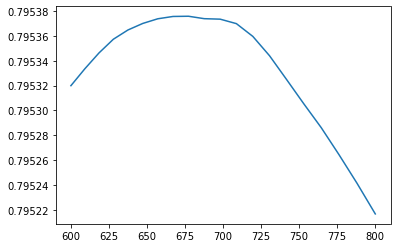

In [47]:
#Hyperparameter Tuning - Lasso Linear Regression
kfold_spliter = KFold(shuffle=True, random_state=416, n_splits=3)
#Lasso_alphas = np.geomspace(1e2, 1e4, num=20)
Lasso_alphas = np.geomspace(600, 800, num=20) #700 best alpha
Lasso_scores = []

for alpha in Lasso_alphas:
    Lasso_model = Lasso(alpha=alpha, max_iter=100000)
    
    Lasso_estimator = Pipeline([("scaler", StandardScaler()),
                                ("Lasso_Regression", Lasso_model)])
    
    Lasso_predictions = cross_val_predict(Lasso_estimator, X_modeldata_ohc, y_modeldata_ohc, cv=kfold_spliter)
    Lasso_score = r2_score(y_modeldata_ohc, Lasso_predictions)
    Lasso_scores.append(Lasso_score)
    
#plt.semilogx(Lasso_alphas, Lasso_scores)
plt.plot(Lasso_alphas, Lasso_scores)

In [48]:
#Define RMSE for Cross-Model Validation Comparison
def RMSE(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

In [49]:
#Vanilla Linear Regression - Baseline LR & Polynomial LR
BaselineLR_model = LinearRegression().fit(X_train_ohc, y_train_ohc)
BaselineLR_RMSE = RMSE(y_test_ohc, BaselineLR_model.predict(X_test_ohc))

PolyLR_model = LinearRegression().fit(X_train_ohcwpoly, y_train_ohcwpoly)
PolyLR_RMSE = RMSE(y_test_ohcwpoly, PolyLR_model.predict(X_test_ohcwpoly))

[BaselineLR_RMSE, PolyLR_RMSE]

[37671.74630681057, 35388.06301687657]

In [50]:
#Regularized Linear Regression - Ridge LR & Lasso LR
stdscaler = StandardScaler()
X_train_ohcwpoly_scal = stdscaler.fit_transform(X_train_ohcwpoly)
X_test_ohcwpoly_scal = stdscaler.transform(X_test_ohcwpoly)

RidgeLR_model = RidgeCV(alphas=np.geomspace(1e0,1e2,num=1000), cv=3).fit(X_train_ohcwpoly_scal, y_train_ohcwpoly)
RidgeLR_RMSE = RMSE(y_test_ohcwpoly, RidgeLR_model.predict(X_test_ohcwpoly_scal))

LassoLR_model = LassoCV(alphas=np.geomspace(1e0,1e3,num=1000), max_iter=1e5, cv=3).fit(X_train_ohcwpoly_scal, y_train_ohcwpoly)
LassoLR_RMSE = RMSE(y_test_ohcwpoly, LassoLR_model.predict(X_test_ohcwpoly_scal))

ElasticNetLR_model = ElasticNetCV(alphas=np.linspace(1e-2,1e-1,1000), l1_ratio=np.linspace(0.1,0.9,20), max_iter=1e5, cv=3).fit(X_train_ohcwpoly_scal, y_train_ohcwpoly)
ElasticNetLR_RMSE = RMSE(y_test_ohcwpoly, ElasticNetLR_model.predict(X_test_ohcwpoly_scal))

#[RidgeLR_model.alpha_, RidgeLR_RMSE]
#[LassoLR_model.alpha_, LassoLR_RMSE]
#[ElasticNetLR_model.alpha_, ElasticNetLR_model.l1_ratio_, ElasticNetLR_RMSE]
[RidgeLR_RMSE, LassoLR_RMSE, ElasticNetLR_RMSE]

[35054.63758406535, 35189.75333690594, 35092.585685313585]

In [51]:
#Summarize LR Models
model_labels = ['Baseline LR', 'Baseline Polynomial LR', 'Ridge Polynomial LR', 'Lasso Polynomial LR', 'ElasticNet Polynomial LR']
RMSE_vals = [BaselineLR_RMSE, PolyLR_RMSE, RidgeLR_RMSE, LassoLR_RMSE, ElasticNetLR_RMSE]

pd.Series(RMSE_vals, index=model_labels).to_frame().rename(columns={0: 'RMSE'})

,RMSE
Baseline LR,37671.746307
Baseline Polynomial LR,35388.063017
Ridge Polynomial LR,35054.637584
Lasso Polynomial LR,35189.753337
ElasticNet Polynomial LR,35092.585685


[Text(0.5, 0, 'SalePrice Actuals'),
 Text(0, 0.5, 'SalePrice Predictions'),
 (0.0, 611657.0),
 (0.0, 611657.0),
 Text(0.5, 1.0, 'Linear Regression Model Validation')]

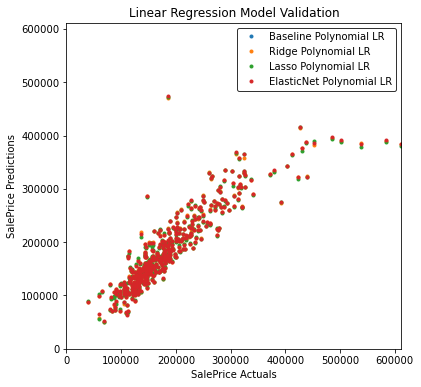

In [52]:
#Visualize LR Models
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Baseline Polynomial LR', 'Ridge Polynomial LR', 'Lasso Polynomial LR', 'ElasticNet Polynomial LR']
models = [PolyLR_model, RidgeLR_model, LassoLR_model, ElasticNetLR_model]

for model, label in zip(models, labels):
    ax.plot(y_test_ohcwpoly, model.predict(X_test_ohcwpoly_scal),
            marker='o', ls='', ms=3.0, label=label)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='SalePrice Actuals',
       ylabel='SalePrice Predictions',
       xlim=(0, y_test_ohcwpoly.max()),
       ylim=(0, y_test_ohcwpoly.max()),
       title='Linear Regression Model Validation')


Text(0.5, 0.98, 'TestSet Validation: Linear Regression Models - w/ Regularization')

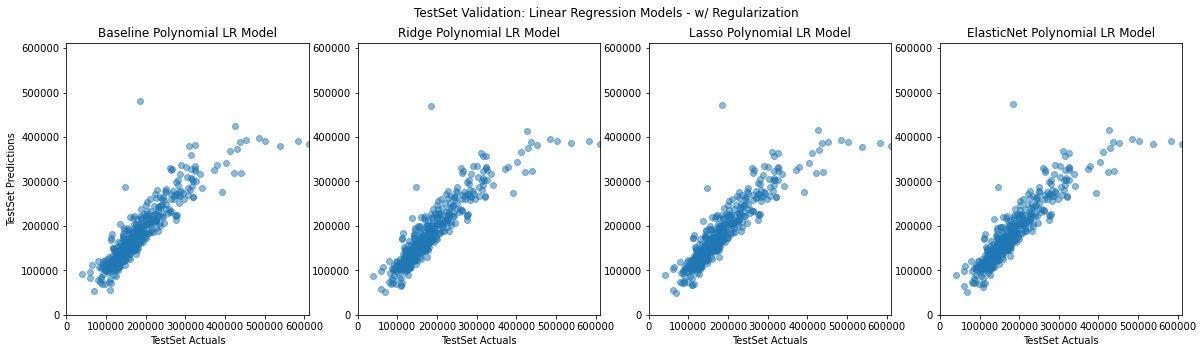

In [60]:
models_testing = 'Linear Regression Models - w/ Regularization'

fig, (ax_poly, ax_ridge, ax_lasso, ax_elasticnet) = plt.subplots(1,4,figsize=(20,5))
ax_poly.scatter(y_test_ohcwpoly, PolyLR_model.predict(X_test_ohcwpoly), alpha=0.5)
ax_ridge.scatter(y_test_ohcwpoly, RidgeLR_model.predict(X_test_ohcwpoly_scal), alpha=0.5)
ax_lasso.scatter(y_test_ohcwpoly, LassoLR_model.predict(X_test_ohcwpoly_scal), alpha=0.5)
ax_elasticnet.scatter(y_test_ohcwpoly, ElasticNetLR_model.predict(X_test_ohcwpoly_scal), alpha=0.5)

ax_poly.set(title='Baseline Polynomial LR Model',ylabel='TestSet Predictions',xlabel='TestSet Actuals',xlim=(0,y_test_ohcwpoly.max()),ylim=(0,y_test_ohcwpoly.max()))
ax_ridge.set(title='Ridge Polynomial LR Model',xlabel='TestSet Actuals',xlim=(0,y_test_ohcwpoly.max()),ylim=(0,y_test_ohcwpoly.max()))
ax_lasso.set(title='Lasso Polynomial LR Model',xlabel='TestSet Actuals',xlim=(0,y_test_ohcwpoly.max()),ylim=(0,y_test_ohcwpoly.max()))
ax_elasticnet.set(title='ElasticNet Polynomial LR Model', xlabel='TestSet Actuals',xlim=(0,y_test_ohcwpoly.max()),ylim=(0,y_test_ohcwpoly.max()))

fig.suptitle('TestSet Validation: {}'.format(models_testing))


In [54]:
pd.DataFrame(zip(X_modeldata_ohcwpoly.columns,BaselineLR_model.coef_)).sort_values(by=1)

,0,1
10,LotShape_IR3,-27400.463098
44,HouseStyle_2.5Unf,-24259.748979
52,SaleCondition_Partial,-20139.165538
56,SaleType_ConLI,-17146.124369
30,Neighborhood_NWAmes,-16422.300332
...,...,...
26,Neighborhood_MeadowV,46044.839930
38,Neighborhood_StoneBr,52977.377503
31,Neighborhood_NoRidge,64585.198133
53,SaleType_CWD,77565.393590


In [55]:
pd.DataFrame(zip(X_modeldata_ohcwpoly.columns,PolyLR_model.coef_)).sort_values(by=1)

,0,1
1,OverallQual,-66274.820116
10,LotShape_IR3,-27656.093194
15,GarageType_CarPort,-18239.342299
23,Neighborhood_Edwards,-17147.223608
52,SaleCondition_Partial,-16614.928753
...,...,...
53,SaleType_CWD,36379.778696
58,SaleType_New,37651.376225
54,SaleType_Con,41915.824659
31,Neighborhood_NoRidge,50156.957134


In [56]:
pd.DataFrame(zip(X_modeldata_ohcwpoly.columns,RidgeLR_model.coef_)).sort_values(by=1)

,0,1
1,OverallQual,-58329.970850
52,SaleCondition_Partial,-3935.941127
23,Neighborhood_Edwards,-3272.601152
33,Neighborhood_OldTown,-3057.393014
30,Neighborhood_NWAmes,-2788.467266
...,...,...
64,LotArea / TotRmsAbvGrd,10033.990442
0,OverallCond,10411.592540
6,YearBuilt,11067.587446
4,GrLivArea,31497.084776


In [57]:
X_modeldata_ohcwpoly['OverallQual'].value_counts()

5     365
6     362
7     318
8     167
4      90
9      43
10     18
3      14
2       2
Name: OverallQual, dtype: int64